# Lab2 数字图像频域增强实验
**Author: Gao Pengbing (nbgao)**  
**Email: nbgao@126.com**

# Work2 灰度和彩色图像的快速傅立叶变换

## Work2-P1
对输入的灰度和彩色图像进行快速傅立叶变换,显示频谱图

## Work2-P2
进行逆变换,观察结果

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifft2, ifftshift
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def FFT(image):
    if(np.ndim(image)==2):  # 单通道灰度图像
        fft = fft2(image)
        fshift = fftshift(fft)
        img_fft = np.log(np.abs(fshift))
        
        plt.figure(figsize=(2*5, 5*image.shape[0]/image.shape[1]))
        plt.subplot(121)
        plt.imshow(image, 'gray')
        plt.title('Original')
        plt.axis('off')

        plt.subplot(122)
        plt.imshow(img_fft, 'gray')
        plt.title('FFT')
        plt.axis('off')
        plt.show()

        return img_fft, fshift

    elif(np.ndim(image)==3):    # 三通道彩色图像
        fft = [fft2(image[:,:,i]) for i in range(3)]
        fshift = [fftshift(fft[i]) for i in range(3)]
        img_fft = [np.log(np.abs(fshift[i])) for i in range(3)]

        plt.figure(figsize=(4*5, 5*image.shape[0]/image.shape[1]))
        plt.subplot(141)
        plt.imshow(image)
        plt.title('Original')
        plt.axis('off')

        plt.subplot(142)
        plt.imshow(img_fft[0], 'Reds')
        plt.title('FFT R')
        plt.axis('off')
        
        plt.subplot(143)
        plt.imshow(img_fft[1], 'Greens')
        plt.title('FFT G')
        plt.axis('off')

        plt.subplot(144)
        plt.imshow(img_fft[2], 'Blues')
        plt.title('FFT B')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        return img_fft, fshift

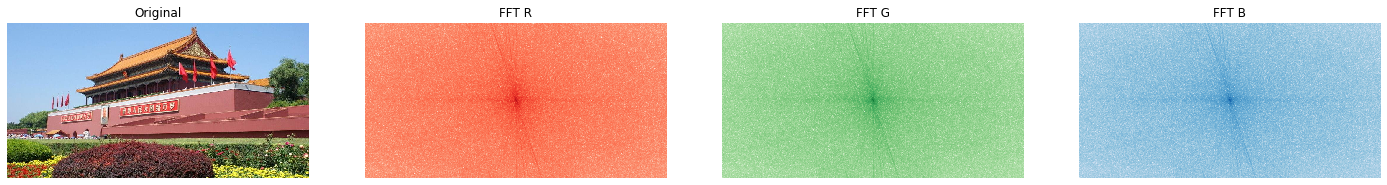

In [4]:
img_bgr = cv2.imread('../Image/image1.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_rgb_fft, fshift_list = FFT(img_rgb)

In [5]:
def IFFT(fshift):
    if(np.ndim(fshift)==2):  # 单通道灰度图像
        ishift = np.fft.ifftshift(fshift)
        ifft = np.fft.ifft2(ishift)
        img_ifft = np.abs(ifft)
        
        plt.figure(figsize=(5, 5*np.shape(fshift)[-2]/np.shape(fshift)[-1]))
        plt.imshow(img_ifft, 'gray')
        plt.title('IFFT')
        plt.axis('off')
        plt.show()

        return img_ifft, ifft

    elif(np.ndim(fshift)==3):    # 三通道彩色图像
        ishift = [ifftshift(fshift[i]) for i in range(3)]
        ifft = [ifft2(ishift[i]) for i in range(3)]
        img_ifft = [np.abs(ifft[i]) for i in range(3)]
        img_ifft = np.uint8(cv2.merge(img_ifft))


        plt.figure(figsize=(5, 5*np.shape(fshift)[-2]/np.shape(fshift)[-1]))
        plt.imshow(img_ifft)
        plt.title('IFFT')
        plt.axis('off')
        plt.show()

        return img_ifft

Image1: (527, 1024, 3)


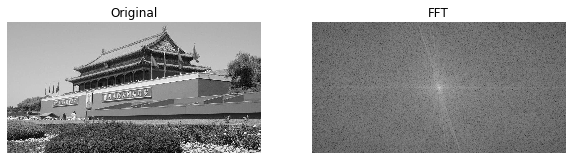

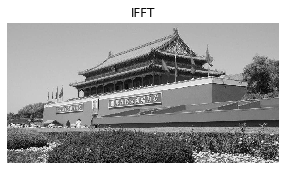

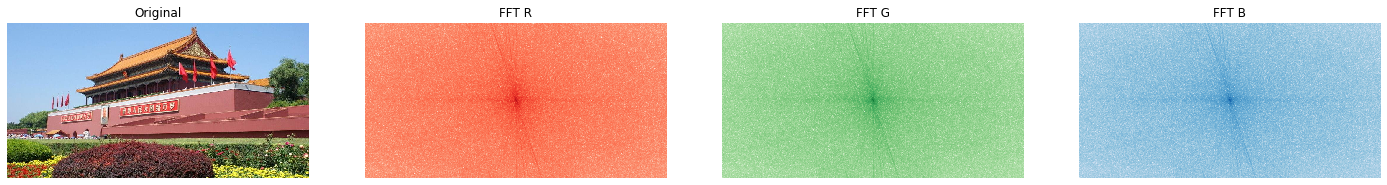

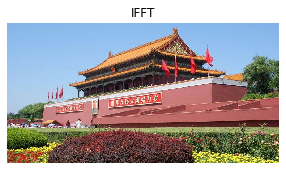

Image2: (264, 400, 3)


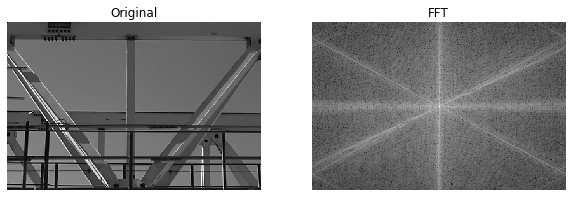

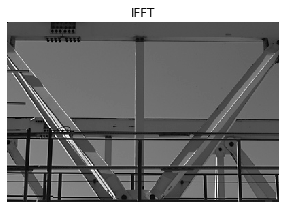

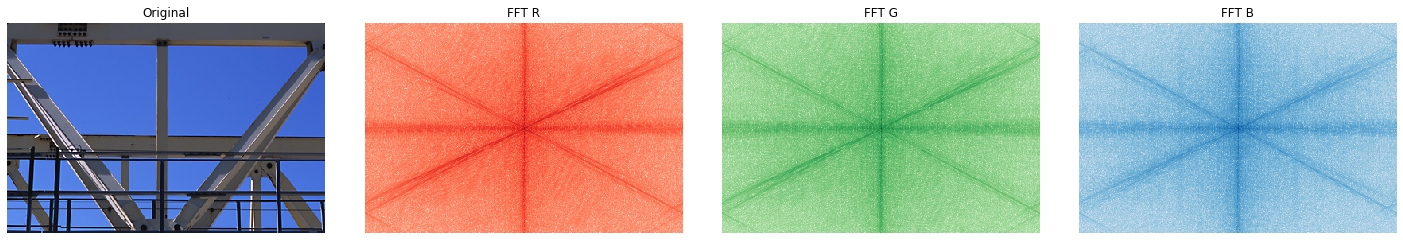

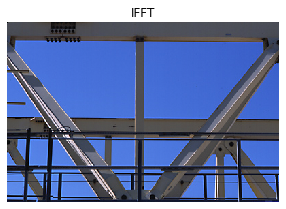

Image3: (300, 300, 3)


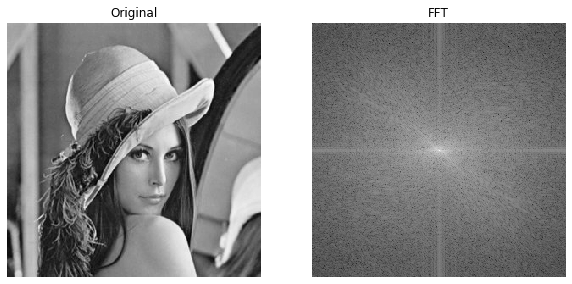

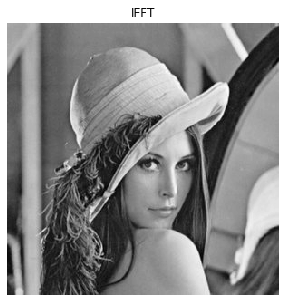

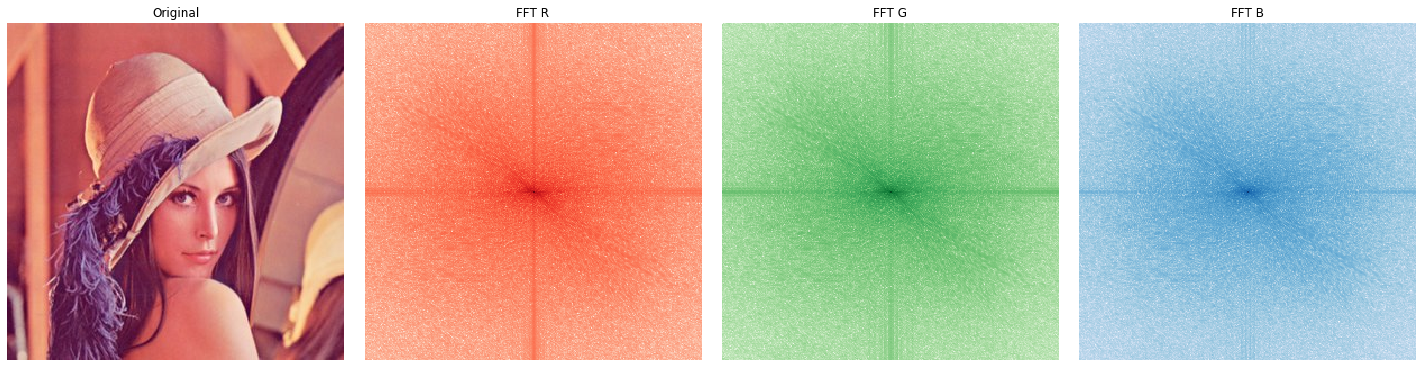

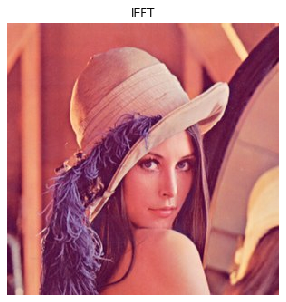

Image4: (382, 550, 3)


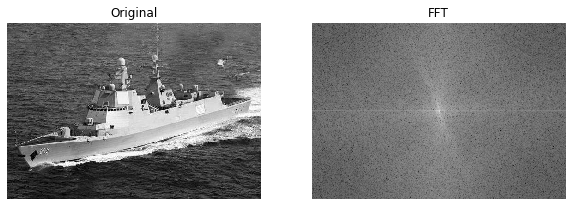

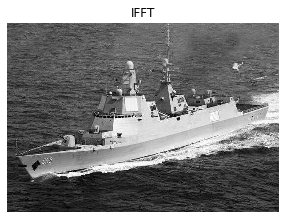

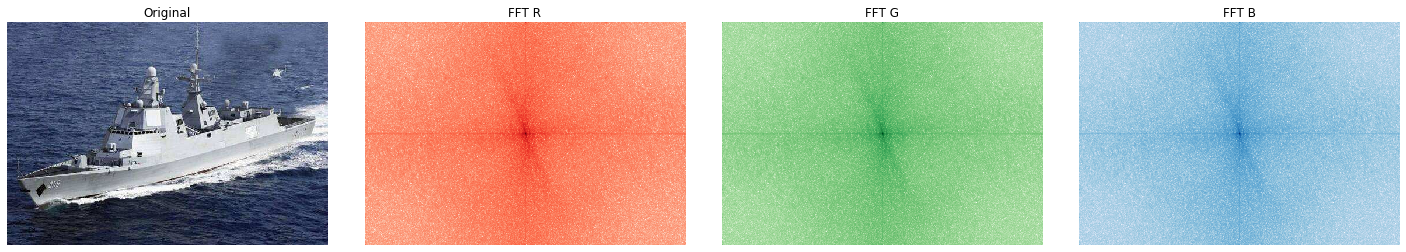

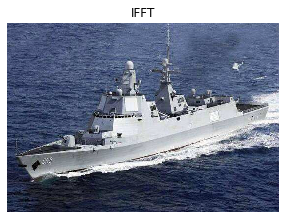

Image5: (466, 641, 3)


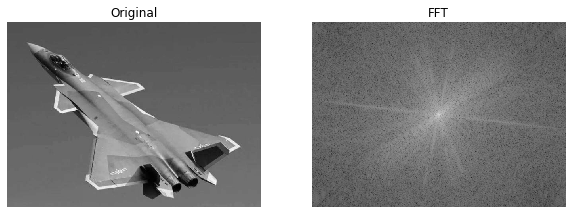

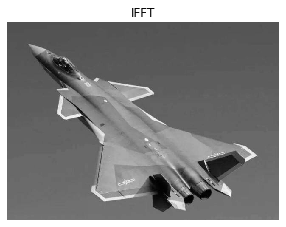

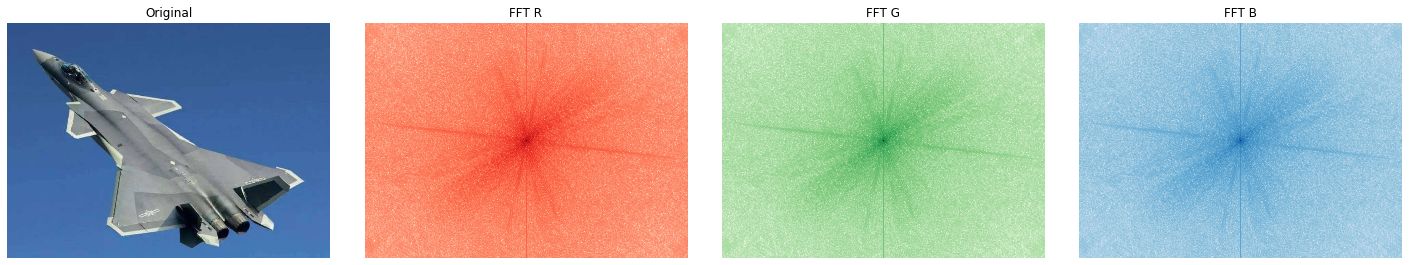

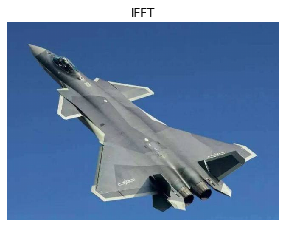

In [7]:

for i in range(1,6):
    file_path = '../Image/image'+str(i)+'.jpg'
    img_bgr = cv2.imread(file_path)

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    print('Image{}:'.format(i), img_rgb.shape)
    # 灰度图 FFT IFFT
    img_gray_fft, fshift_gray = FFT(img_gray)
    img_gray_ifft = IFFT(fshift_gray)
    # 彩色图 FFT IFFT
    img_rgb_fft, fshift_rgb = FFT(img_rgb)
    img_rgb_ifft = IFFT(fshift_rgb)
    